$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\vv}{\mathbf{v}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\tv}{\mathbf{t}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Wm}{\mathbf{W}}
 \newcommand{\Ym}{\mathbf{Y}}
 \newcommand{\I}{\mathbf{I}}
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
$

# Support Vector Machines (SVM)

What is a good classifier? There can be multiple hyperplanes that divides the data in two classes. SVMs, largin margin classifiers, choose the hyperplane that has a large margine. 

The idea of support vector machines, or the large margin linear classifiers, first suggested in 1963 by Vapnik, et al. In 1992, [Boser, et al.](https://dl.acm.org/citation.cfm?id=130401), extended this to nonlinear classification and [Cortes, et al.](http://image.diku.dk/imagecanon/material/cortes_vapnik95.pdf), further examines non-separable data in 1995. After this, lots of large margin algorithms have been developed.  


Let us take a look at the classifier choice with a largin margin and talk about other issues. 


## What is the best classifier?

<table>
<tr>
<td><img src="https://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/exampledata.png" width=400 /> </td>
<td> <img src="https://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/classifiers.png" width=400 /> </td>
</tr>
</table>

## Large Margin Classifier

Margin is the distance or room between the hyperplane and the closest data samples from each class. 
The margin gives the classifer flexibility to changes of data or variant future data. Thus, having the largest margin can be a good choice. 

<table>
<tr>
<td><img src="https://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/margin1.png" width=400 /> </td>
<td> <img src="https://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/margin2.png" width=400 /> </td>
</tr>
<tr>
<td><img src="https://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/margin3.png" width=400 /> </td>
<td> <img src="https://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/margin4.png" width=400 /> </td>
</tr>
</table>


# Geometric Margin 

<img src="https://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/geo_margin.png" width=450 />

The margin, $d$, can be calculated by the linear projection with a unit vector in the direction of $\wv$, $\hat{\wv}$.

Let us say that there is a point $\zv$ on a line, 
$$
\wv^\top \zv + b = 0.
$$ 

Also, we assume that $\zv$ is orthogoal to a data point $\xv$:
$$
\zv = \xv + d \hat{\wv}.
$$

Plugging in this to the hyperplane equation $\yv = \wv^\top \xv + b$, 

$$
\begin{align*}
\wv^\top \zv + b &= \wv^\top (\xv + d \hat{\wv}) + b \\
0 &= \wv^\top \xv + d \wv^\top \hat{\wv} + b \\ 
0 &= y + d \wv^\top \frac{\wv}{\Vert \wv \Vert} = y + d \frac{\Vert \wv \Vert^2}{\Vert \wv \Vert}\\
d &= -\frac{y}{\Vert \wv \Vert}
\end{align*}
$$

Now, let us check the sign of the label. We assume that the data point $\xv$ here was from negative samples. 
That is, the $\yv$ is negative. 
Looking back our perceptron, we use our label to unify the objective function:

$$
t_i y_i = \tv_i (\wv^\top \xv_i + b) \gt 0.
$$

If we rescaling the weights and bias, we can get the following canonical hyperplane with the minimum distance to be 1:

$$
\min_{n=1, \dots, N} t_n (\wv^\top \xv + b) = 1.
$$

Under this assumption, we get the margin that equals to 

$$d = \frac{1}{\Vert \wv \Vert}.$$


Remember that we want *maximize* this margine $\frac{1}{\Vert \wv \Vert}$, so we can invert this to *minimize*  $\Vert \wv \Vert$. 

## The Linear SVM

The objective function can be written as:

$$
\begin{equation*}
\begin{aligned}
& \underset{\wv, b}{\text{minimize}}
& & \frac{1}{2} \Vert \wv \Vert^2 \\
& \text{subject to}
& & t_i (\wv^\top \xv_i + b) \ge 1, \; i = 1, \ldots, N.
\end{aligned}
\end{equation*}
$$

The Lagrangian is 

$$
L = \frac{\Vert \wv \Vert^2 }{2} - \sum_i^N \lambda_i \big( t_i (\wv^\top \xv_i + b) - 1 \big).
$$

Let us find the optimal solution with gradient! 
With positive Lagrangian multipliers $\lambda = [\lambda_1, \ldots, \lambda_N]$ and the constraint, 
we can find the two additional gradient against $\lambda$ and $\wv$ and set to to zero to obtain the optimal conditions. That is, 

$$
\begin{cases}
\frac{\partial L}{\partial \wv} = 0, \\
\frac{\partial L}{\partial b} = 0, \\
t_i (\wv^\top \xv_i + b) - 1 \ge 0, \\
\lambda \ge 0, \\
\lambda_i \big(t_i (\wv^\top \xv_i + b) - 1\big) = 0.
\end{cases}
$$

This is called **Karush–Kuhn–Tucker (KKT)** conditions (See http://www.svms.org/kkt/ and http://mat.gsia.cmu.edu/classes/QUANT/NOTES/chap4/node6.html).

Going through few steps for the derivaiton,
$$
\begin{align*}
\frac{\partial L}{\partial \wv} &= \wv - \sum_i^N \lambda_i t_i \xv_i = 0\\
\wv &= \sum_i^N \lambda_i t_i \xv_i,
\end{align*}
$$
and 
$$
\begin{align*}
\frac{\partial L}{\partial b} &= - \sum_i^N \lambda_i t_i = 0\\
    \sum_i^N \lambda_i t_i &= 0. 
\end{align*}
$$

Rewriting and summarizing the KKT conditions, 

$$
\begin{align*}
&\wv = \sum_i^N \lambda_i t_i \xv_i, \\
&\sum_i^N \lambda_i t_i = 0, \\
&t_i (\wv^\top \xv_i + b) - 1 \ge 0, \\
\\
&\lambda \ge 0, \\
\\
&\lambda_i \big(t_i (\wv^\top \xv_i + b) - 1\big) = 0.
&\end{align*}
$$


# Dual Problem

For duality convention, let us change the notation $\lambda$ to $\alpha$:

$$
\begin{equation}
    \wv = \sum_i^N \alpha_i t_i \xv_i. \label{eq_w} \tag{1}
\end{equation}
$$

Since there is no solution for $b$, use the KKT condition and find it:

$$
\begin{align}
\lambda_i \big(t_i (\wv^\top \xv_i + b) - 1\big) &= 0 \\
t_i (\wv^\top \xv_i + b) &= 1 \\
\wv^\top \xv_i + b = t_i \\
\\
b = t_i - \wv^\top \xv_i. \label{eq_b} \tag{2}
\end{align}
$$

With the KKT conditions, 
$$
\alpha_i > 0 \\
\text{and}\\
t_i (\wv^\top \xv + b) = 1,
$$
the $\xv_i$ are the data samples that lie on the re-weighted margin *1*. 

The corresponding $\xv_i$ are called **support vectors**, that support the hyperplane construction. 

Now, using the KKT conditions, replace $\wv$ and $b$ in the objective function $L$ with $\eqref{eq_w}$ and $\eqref{eq_b}$,

$$
\begin{align*}
L &= \frac{\Vert \wv \Vert^2 }{2} - \sum_i^N \alpha_i \big( t_i (\wv^\top \xv_i + b) - 1 \big) \\
  &= \frac{1}{2} \Big( \sum_i^N \alpha_i t_i \xv_i \Big)^\top \Big( \sum_i^N \alpha_i t_i \xv_i \Big) 
     - \sum_i^N \alpha_i t_i \Big( \sum_j^N \alpha_j t_j \xv_j \Big)^\top \xv_i 
     - b \sum_i^N \alpha_i t_i 
     + \sum_i^N \alpha_i \\
  &= \frac{1}{2} \sum_i^N \sum_j^N \alpha_i \alpha_j t_i t_j  \xv_i^\top \xv_j  
     - \sum_i^N \sum_j^N  \alpha_i \alpha_j t_i t_j \xv_i^\top  \xv_j 
     - b \sum_i^N \alpha_i t_i 
     + \sum_i^N \alpha_i \\
  &= - \frac{1}{2} \sum_i^N \sum_j^N \alpha_i \alpha_j t_i t_j  \xv_i^\top \xv_j + \sum_i^N \alpha_i.
\end{align*}
$$

Let us rewrite the optimization problem in duality:

$$
\begin{equation*}
\begin{aligned}
& \underset{\alpha}{\text{maximize}}
& & \sum_i^N \alpha_i - \frac{1}{2} \sum_i^N \sum_j^N \alpha_i \alpha_j t_i t_j  \xv_i^\top \xv_j \\
& \text{subject to}
& & \sum_i^N \alpha_i t_i = 0, \\
& & &\alpha_i \ge 0.
\end{aligned}
\end{equation*}
$$

# Soft Margin SVM

So far, we constrained the data is clearly separable: 

$$
t_i (\wv^\top \xv_i + b) \ge 1.
$$

To relax this constraints, we can define additional slack variables $\xi_i \ge 0$:

$$
t_i (\wv^\top \xv_i + b) \ge 1 - \xi_i.
$$

With the slack variables, the objective function is

$$
\begin{equation*}
\begin{aligned}
& \underset{\wv, b, \xi}{\text{minimize}}
& & \frac{1}{2} \Vert \wv \Vert^2 + C \sum_i \xi_i \\
& \text{subject to}
& & t_i (\wv^\top \xv_i + b) \ge 1 - \xi_i,\\
& & & \xi_i \ge 0 \quad \; i = 1, \ldots, N.
\end{aligned}
\end{equation*}
$$

From the Lagrangin, 

$$
L = \frac{\Vert \wv \Vert^2 }{2} - \sum_i^N \alpha_i \big( t_i (\wv^\top \xv_i + b) - 1 + \xi_i \big) - \sum_i^N \beta_i \xi_i + C \sum_i^N \xi_i,
$$

we get the same saddle point equations as in $\eqref{eq_w}$ and $\eqref{eq_b}$ along with the following:

$$
\frac{\partial L}{\partial \xi_i} = C - \alpha_i - \beta_i = 0.
$$

This leads us to dual problem of

$$
\begin{equation*} 
\begin{aligned}
& \underset{\alpha}{\text{maximize}}
& & \sum_i^N \alpha_i - \frac{1}{2} \sum_i^N \sum_j^N \alpha_i \alpha_j t_i t_j  \xv_i^\top \xv_j \\
& \text{subject to}
& & \sum_i^N \alpha_i t_i = 0, \\
& & &\alpha_i \ge 0, \\
& & &\beta_i \ge 0, \\
& & &C - \alpha_i - \beta_i = 0. 
\end{aligned}
\end{equation*}
$$

Using the last saddle point equaiton, we can replace $\beta_i$ inequality with the 
$$
0 \le \alpha_i \le C.
$$

$$
\begin{equation*}
\begin{aligned}
& \underset{\alpha}{\text{maximize}}
& & \sum_i^N \alpha_i - \frac{1}{2} \sum_i^N \sum_j^N \alpha_i \alpha_j t_i t_j  \xv_i^\top \xv_j \\
& \text{subject to}
& & \sum_i^N \alpha_i t_i = 0, \\
& & &0 \le \alpha_i \le C.
\end{aligned}
\end{equation*}
$$

# Kernels

For the data that cannot be classified with a linear classifier, we used a non-linear function mapping from $\xv$ to $\phi(\xv)$. We can use this nonlinear mapping for the SVM as well:

$$
\begin{equation*}
\begin{aligned}
& \underset{\wv, b, \xi}{\text{minimize}}
& & \frac{1}{2} \Vert \wv \Vert^2 + C \sum_i \xi_i \\
& \text{subject to}
& & t_i (\wv^\top \phi(\xv_i) + b) \ge 1 - \xi_i,\\
& & & \xi_i \ge 0 \quad \; i = 1, \ldots, N.
\end{aligned}
\end{equation*}
$$

In duality, we can write the optimization problem as 

$$
\begin{equation*} \
\begin{aligned}
& \underset{\alpha}{\text{maximize}}
& & \sum_i^N \alpha_i - \frac{1}{2} \sum_i^N \sum_j^N \alpha_i \alpha_j t_i t_j  \phi(\xv_i)^\top \phi(\xv_j) \\
& \text{subject to}
& & \sum_i^N \alpha_i t_i = 0, \\
& & &0 \le \alpha_i \le C.
\end{aligned}
\end{equation*}
$$

In nonlinear feature space $\Phi$, the inner product $\phi^\top \phi$ compute the euclidean distance between betweeen two feature vectors. We define this distance, or similarity measure as a kernel $k$: 

$$
k(\xv, \vv) = \phi(\xv)^\top \phi(\vv).
$$

With this kernel notation, the dual problem can be written as

$$
\begin{equation*}
\begin{aligned}
& \underset{\alpha}{\text{maximize}}
& & \sum_i^N \alpha_i - \frac{1}{2} \sum_i^N \sum_j^N \alpha_i \alpha_j t_i t_j k(\xv_i, \xv_j) \\
& \text{subject to}
& & \sum_i^N \alpha_i t_i = 0, \\
& & &0 \le \alpha_i \le C.
\end{aligned}
\end{equation*}
$$


Here are summary of well-known stard kernels.
- Linear Kernel
$$ k(\xv, \yv) = \xv^\top \yv $$
- Polynomial Kernel
$$ k(\xv, \yv) = (\xv^\top \yv + 1)^d $$
- Gaussian Kernel
$$ k(\xv, \yv) = \exp(-\gamma \Vert \xv - \yv \Vert^2) $$


# Then, How do we solve this?

So far, we set up the optimization problems. How do we need to solve or program? 
Any of optimization tools can be used to solve this, but there are some fast optimization tools for the SVM including the sequential minimal optimization (SMO) and libsvm. 

Scikit-learn uses liblinear for the primal and libsvm for the dual problem. 

Now, let us implement svm and try to classify the circles data. You can use any libsvm wrapper like scikit-learn, but for exercise, let us use gradient descent for learning. 

The derivative of the objective function w.r.t. $\alpha$ is 

$$
\frac{\partial L}{\partial \alpha_i} = 1 - t_i \sum_j^N \alpha_j t_j k(\xv_i, \xv_j) - \sum_j^N t_i.
$$

From 

$$
\wv = \sum_i^N \alpha_i t_i \xv_i, 
$$

$$
\wv^\top \xv_i = \sum_j^N \alpha_j t_j \xv_j^\top \xv_i = \sum_j^N \alpha_j t_j k(\xv_j, \xv_i).
$$
Thus,
$$
b = t_i - \wv^\top \xv_i = 
t_i - \sum_j^N \alpha_j t_j k(\xv_j, \xv_i),
$$

we can make a prediction using the $\wv$, $b$, and the kernel evaluations. 


Text(0.5, 1.0, 'Circles')

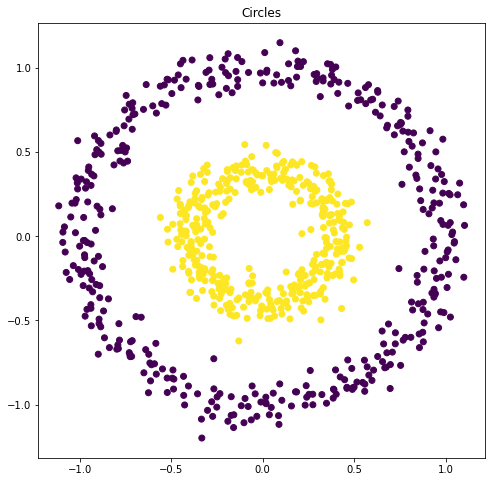

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles

X, T = make_circles(n_samples=800, noise=0.07, factor=0.4)
T[T==0] = -1

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=T)
plt.title("Circles")

In [2]:
# linear kernel
def linear_kernel(x, y):
    return x @ y 

def polynomial_kernel(x, y, d=3):
    return (x @ y +1) ** d

def gaussian_kernel(x, y, r=1.):
    d = (x - y)
    return np.exp(-r * (d @ d))

In [ ]:
from functools import partial

kernelf = partial(linear_kernel)

###### build a kernel matrix (optional)
def build_Kmat(X, Xn=X, kernelf=linear_kernel):
    N = X.shape[0]
    Nn = Xn.shape[0]

    K = # TODO: finish this line to create a kernel matrix
    return K

In [107]:
K = build_Kmat(X, X, kernelf)
T.shape, K[0, :].shape

((800,), (800,))

In [101]:
def train(X, T, K, n_epochs=1, learning_rate=0.01, C=10):

    N = X.shape[0]

    #alpha = np.random.rand(N)
    alpha = np.zeros(N)
    T_sum = np.sum(T)
    for n in range(n_epochs):
        for i in range(N):
            grad = # TODO: fill this gradient
            alpha += learning_rate * grad

            alpha[alpha <= 0] = 0 
            alpha[alpha >= C] = C
    b = # TODO: Finish this b
    return alpha, b


In [102]:
# predict
#
# Parameters
# ===========
# Xtest    test input
# alpha    SVM learned parameters 
# X        Support Vectors
# T        Target for SVs
# K        kernel matrix if exists
def predict(Xtest, alpha, b, **params):
    # support vectors
    i_sv = np.where(np.logical_and(alpha<C, alpha>0))[0]

    K = params.pop('K', None)
    T = params.pop('T', None) 
    if T is None:
        raise ValueError("predict: None support vector targets!")

    if K is None:
        kernelf = params.pop('kernelf', linear_kernel)
        X = params.pop('X', None)
        if X is None:
            raise ValueError("predict: None support vectors!")
        print("rebuilding kernel matrix")
        K = build_Kmat(X, Xtest, kernelf)
    
    y = # TP
    return y


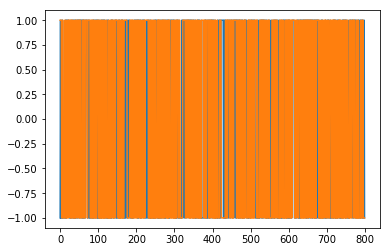

Accuracy:  49.625 %


In [108]:
# train
alpha, b = train(X, T, K)

# prediction
y = predict(X, alpha, b, K=K, T=T)

# plot
plt.plot(T)
plt.plot(np.sign(y))
plt.show()

print("Accuracy: ", 100 * np.sum(T == np.sign(y)) / N, "%")

rebuilding kernel matrix


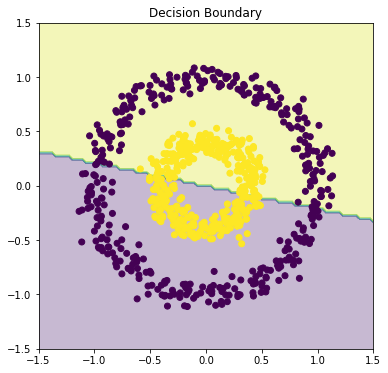

In [109]:

x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)

xs, ys = np.meshgrid(x, y)

Xt = np.vstack((xs.flat, ys.flat)).T

Y = predict(Xt, alpha, b, X=X, T=T) 
classes = np.sign(Y)

zs = classes.reshape(xs.shape)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape), alpha=0.3)
plt.title("Decision Boundary")

plt.scatter(X[:, 0], X[:, 1], marker='o', c=T+3)

In [103]:
# nonlinear now
gausskf = partial(gaussian_kernel, r=0.1)
K = build_Kmat(X, X, gausskf)

In [104]:
alpha, b = train(X, T, K)

In [105]:
# predict
y = predict(X, alpha, b, K=Kg, T=T)
print("Accuracy: ", 100 * np.sum(T == np.sign(y)) / N, "%")

Accuracy:  100.0 %


rebuilding kernel matrix


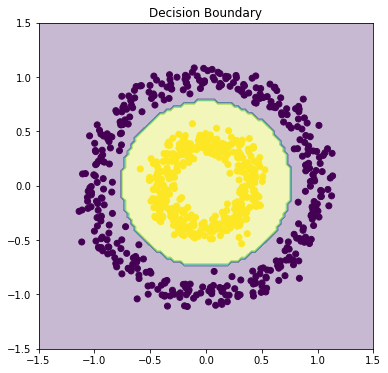

In [106]:

x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)

xs, ys = np.meshgrid(x, y)

Xt = np.vstack((xs.flat, ys.flat)).T

Y = predict(Xt, alpha, b, X=X, T=T, kernelf=gausskf)
classes = np.sign(Y)

zs = classes.reshape(xs.shape)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape), alpha=0.3)
plt.title("Decision Boundary")

plt.scatter(X[:, 0], X[:, 1], marker='o', c=T+3)